<a href="https://colab.research.google.com/github/rrohanj/MLREPO/blob/main/week5(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
print("="*60)
print("PART A: MANUAL CALCULATIONS")
print("="*60)

print("\nSample Dataset")
print("Features: [Age, incone]")
print("Target: Buy")
print("\nData:")
data=[
    [0,0,0],
    [0,0,0],
    [1,0,0],
    [2,0,0],
    [2,1,1],
    [2,1,1],
    [1,1,1],
    [0,1,0],
    [2,0,1],
    [0,1,1]
]
df=pd.DataFrame(data,columns=["Age","Income","Buy"])
print(df.to_string(index=False))

PART A: MANUAL CALCULATIONS

Sample Dataset
Features: [Age, incone]
Target: Buy

Data:
 Age  Income  Buy
   0       0    0
   0       0    0
   1       0    0
   2       0    0
   2       1    1
   2       1    1
   1       1    1
   0       1    0
   2       0    1
   0       1    1


In [ ]:
print("\nGini Impurity Calculation:")
print("Formula: 1 - sum(p_i^2)")
labels=df["Buy"].values
n_total=len(labels)
n_yes=sum(labels)
n_no=n_total-n_yes
p_yes=n_yes/n_total
p_no=n_no/n_total
gini= 1 - (p_yes**2 + p_no**2)
print(f"Total: {n_total}, Yes: {n_yes}, No: {n_no}")
print(f"P(Yes)={p_yes:.2f},P(No): {p_no:.2f}")
print(f" Gini= 1- ({p_yes:.2f}^2 + {p_no:.2f}^2) = {gini:4f}")
print("Entropy Calculation:")
print("Formula: - sum(p_i * log2(p_i))")
entropy=0
if p_yes>0:
    entropy-= p_yes*np.log2(p_yes)
if p_no>0:
  entropy-= p_no*np.log2(p_no)
print(f"Entropy= -[{p_yes:.2f}*log2({p_yes:.2f})+{p_no:.2f}*log2({p_no:.2f})] = {entropy:.4f}")
print("\nExample Split: Age<=1")
left=df[df["Age"]<=1]["Buy"].values
right=df[df["Age"]>1]["Buy"].values
def simple_gini(y):
  if len(y)==0:
    return 0
  p1=sum(y)/len(y)
  p0=1-p1
  return 1-(p1**2+ p0 **2)
gini_left=simple_gini(left)
gini_right=simple_gini(right)
weighted_gini=(len(left)/n_total)*gini_left+ (len(right)/n_total)*gini_right
gain=gini-weighted_gini
print(f"Left Branch (Age<=1): {list(left)}")
print(f"Right Branch (Age>1): {list(right)}")
print(f"Gini(left)= {gini_left:.4f}")
print(f"Gini(right)={gini_right:.4f}")
print(f"Weighted average= {weighted_gini:.4f}")
print(f"Information Gain= {gini:.4f}- {weighted_gini:.4f}={gain:.4f}")


Gini Impurity Calculation:
Formula: 1 - sum(p_i^2)
Total: 10, Yes: 5, No: 5
P(Yes)=0.50,P(No): 0.50
 Gini= 1- (0.50^2 + 0.50^2) = 0.500000
Entropy Calculation:
Formula: - sum(p_i * log2(p_i))
Entropy= -[0.50*log2(0.50)+0.50*log2(0.50)] = 1.0000

Example Split: Age<=1
Left Branch (Age<=1): [np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1)]
Right Branch (Age>1): [np.int64(0), np.int64(1), np.int64(1), np.int64(1)]
Gini(left)= 0.4444
Gini(right)=0.3750
Weighted average= 0.4167
Information Gain= 0.5000- 0.4167=0.0833


PART B: IRIS DATASET ANALYSIS
Load Iris Dataset
Samples: 150
Features Used: ['sepal length (cm)', 'sepal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

Data Split
Train: 105 samples
Test: 45 samples

Train Decision Trees

Model Performance:
Gini Accuracy: 0.7556
Entropy Accuracy: 0.667

Visualize Decision Trees


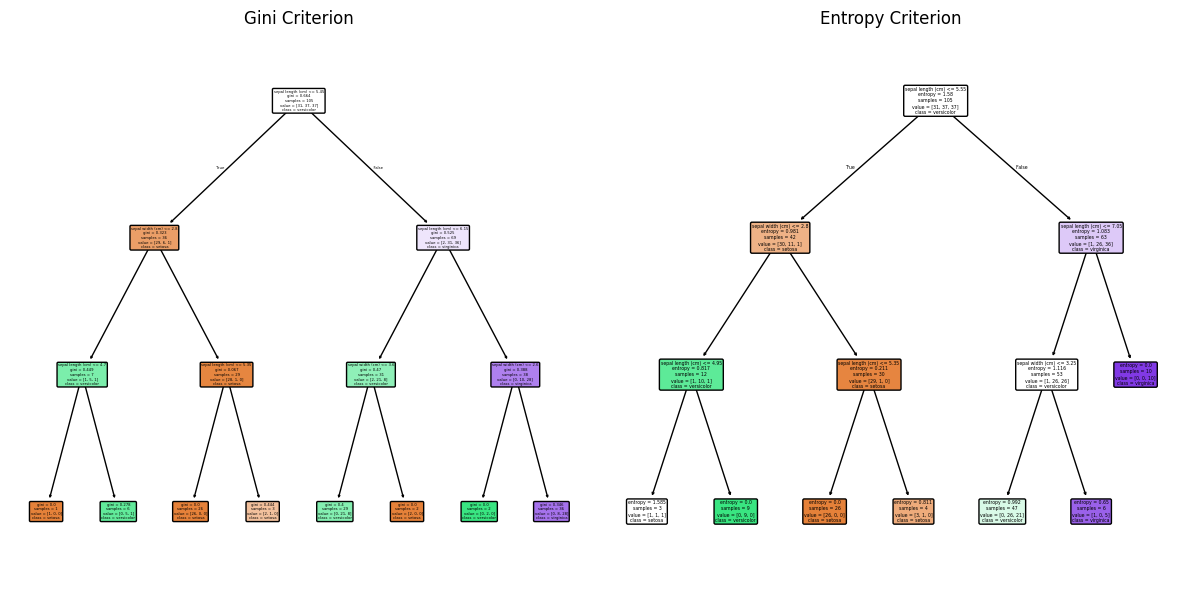


Feature Importance

Gini Importance:
sepal length (cm):0.723
sepal width (cm):0.277

Entropy Importance:
sepal length (cm):0.686
sepal width (cm):0.314

Test Pruning (max_depth)

 Depth | Gini Acc | Entropy Acc
 ------------------------------
    1|    0.644|      0.667
    2|    0.756|      0.711
    3|    0.756|      0.667
    4|    0.756|      0.800
    5|    0.756|      0.756


In [ ]:
print('='*60)
print("PART B: IRIS DATASET ANALYSIS")
print("="*60)
print("Load Iris Dataset")
iris=load_iris()
X,y=iris.data,iris.target
feature_names=iris.feature_names[:2]
target_names=iris.target_names
print(f"Samples: {len(X)}")
print(f"Features Used: {feature_names}")
print(f"Classes: {target_names}")

X_simple=X[:,:2]
X_train,X_test,y_train,y_test=train_test_split(X_simple,y,test_size=0.3,random_state=42)
print("\nData Split")
print(f"Train: {len(X_train)} samples")
print(f"Test: {len(X_test)} samples")

print("\nTrain Decision Trees")
dt_gini=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=3)
dt_gini.fit(X_train,y_train)
dt_entropy=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=3)
dt_entropy.fit(X_train,y_train)

print("\nModel Performance:")
y_pred_gini=dt_gini.predict(X_test)
y_pred_entropy=dt_entropy.predict(X_test)
acc_gini=accuracy_score(y_test,y_pred_gini)
acc_entropy=accuracy_score(y_test,y_pred_entropy)
print(f"Gini Accuracy: {acc_gini:.4f}")
print(f"Entropy Accuracy: {acc_entropy:.3f}")

print("\nVisualize Decision Trees")
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(12,6))
plot_tree(dt_gini,feature_names=feature_names,class_names=target_names,
          filled=True,rounded=True,ax=ax1)
ax1.set_title("Gini Criterion")

plot_tree(dt_entropy,feature_names=feature_names,class_names=target_names
          ,rounded=True,filled=True,ax=ax2)
ax2.set_title("Entropy Criterion")
plt.tight_layout()
plt.show()

print("\nFeature Importance")
print("\nGini Importance:")
for name,imp in zip(feature_names,dt_gini.feature_importances_):
  print(f"{name}:{imp:.3f}")
print("\nEntropy Importance:")
for name,imp in zip(feature_names,dt_entropy.feature_importances_):
  print(f"{name}:{imp:.3f}")
print("\nTest Pruning (max_depth)")
depths=[1,2,3,4,5]
print("\n Depth | Gini Acc | Entropy Acc")
print(" "+"-"*30)
for depth in depths:
  dt_g=DecisionTreeClassifier(criterion="gini",max_depth=depth,random_state=42)
  dt_g.fit(X_train,y_train)
  acc_g=accuracy_score(y_test,dt_g.predict(X_test))
  dt_e=DecisionTreeClassifier(criterion="entropy",max_depth=depth,random_state=42)
  dt_e.fit(X_train,y_train)
  acc_e=accuracy_score(y_test,dt_e.predict(X_test))
  print(f"{depth:5d}| {acc_g:8.3f}| {acc_e:10.3f}")